In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
from scipy.stats import pearsonr

In [ ]:
dframe = pd.read_csv("drive/MyDrive/project_csv_data/gait__Exp1_4.csv")
dframe.head()

,timestamps,ax,ay,az,y
0,2082931,-1.10,-0.24,-0.22,11.46
1,2082953,-1.12,-0.20,-0.20,11.57
2,2082975,-1.07,-0.36,-0.19,11.48
3,2082997,-1.13,-0.04,-0.25,11.52
4,2083019,-1.12,-0.09,-0.24,11.53


In [ ]:
dframe.y

0      11.46
1      11.57
2      11.48
3      11.52
4      11.53
       ...  
335    10.67
336    10.76
337    10.04
338     9.81
339     9.75
Name: y, Length: 340, dtype: float64

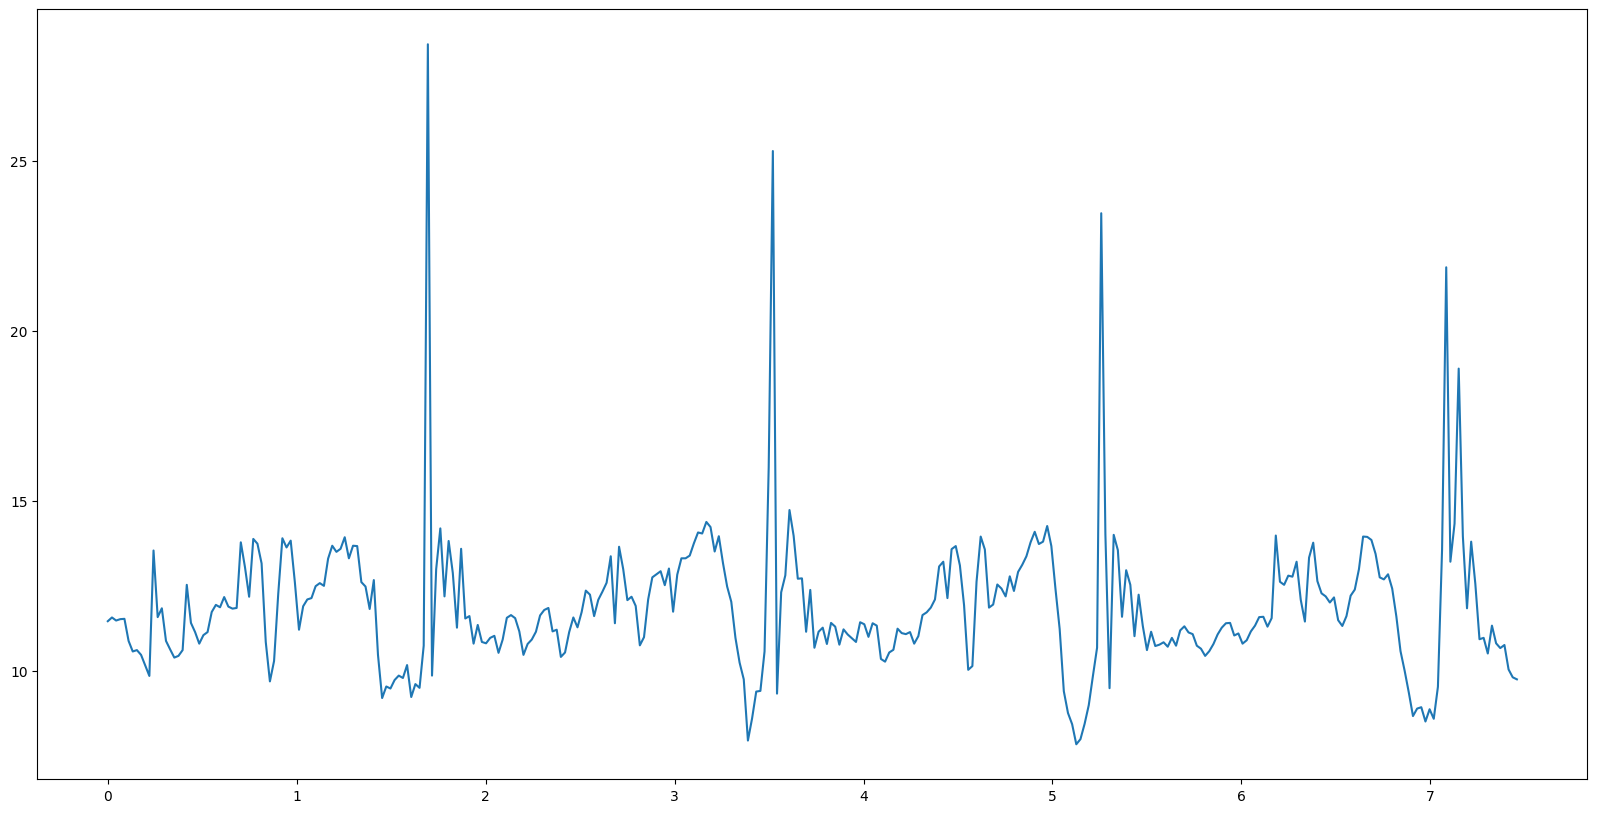

In [ ]:
plt.figure(figsize=(20, 10))

time = []

for i in range(len(dframe.timestamps)):
  time.append((dframe.timestamps[i] - 2082931)/1000)

plt.plot(time, dframe.y)
plt.show()

In [ ]:
time_laps = [1.83, 1.84, 1.79, 1.74]
foot_contact = []
sum = 0

for i in range(len(time_laps)):
  sum += time_laps[i]
  foot_contact.append(sum)

foot_contact

[1.83, 3.67, 5.46, 7.2]

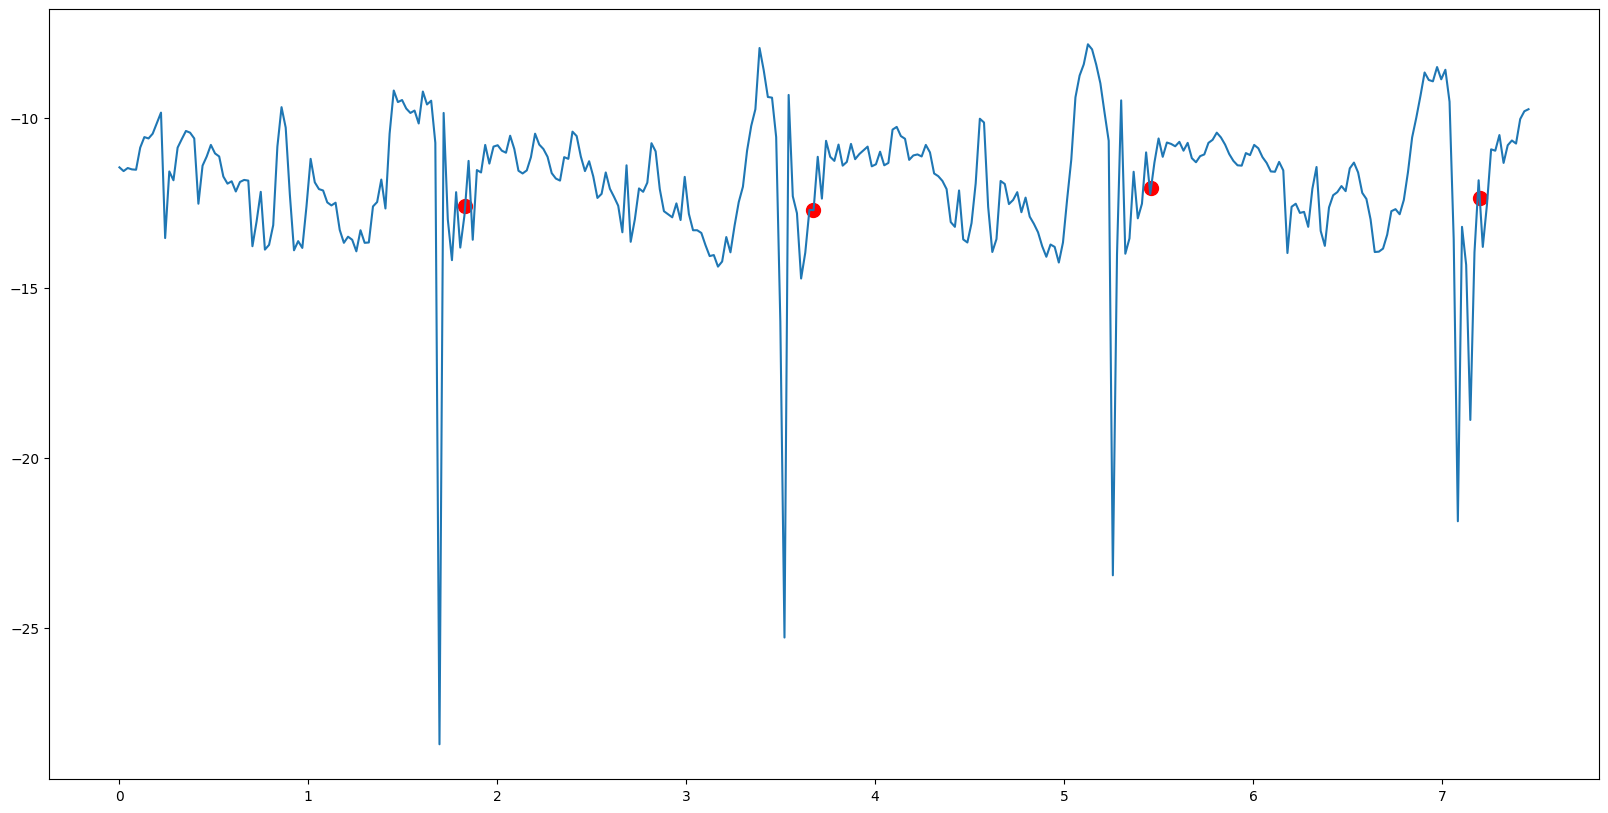

In [ ]:
# from scipy.signal import savgol_filter
# import pywt

# coeffs = pywt.wavedec(dframe.y, 'db4', level=0)
# threshold = np.std(coeffs[-1]) * np.sqrt(2 * np.log(len(dframe.y)))
# coeffs[1:] = (pywt.threshold(c, threshold, mode='soft') for c in coeffs[1:])
# filtered_data = pywt.waverec(coeffs, 'db4')

plt.figure(figsize=(20, 10))
plt.plot(time, (-1 * dframe.y), label='Data')
for index in foot_contact:
    interpolated_value = np.interp(index, time, (-1 * dframe.y))  # Interpolate value at float index
    plt.scatter(index, interpolated_value, color='red', marker='o', s=100, label='Highlight')
plt.show()

In [ ]:
dframe_sub1_t1 = pd.read_csv("drive/MyDrive/project_csv_data/gait_Janvi_1_1.csv")
dframe_sub1_t1.head()

,y,timestamps
0,11.95,118541
1,10.91,118563
2,11.27,118585
3,11.65,118607
4,10.58,118629


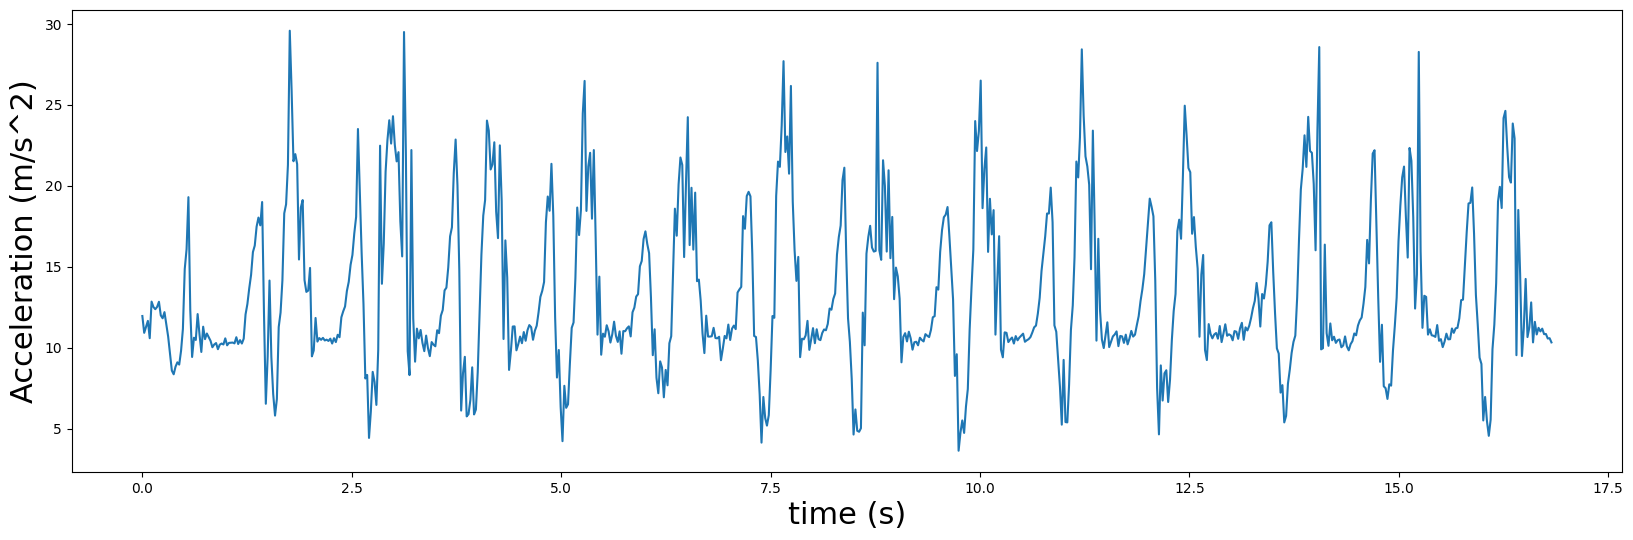

In [ ]:
plt.figure(figsize=(20, 6))

time = []

for i in range(len(dframe_sub1_t1.timestamps)):
  time.append((dframe_sub1_t1.timestamps[i] - 118541)/1000)

dframe_sub1_t1.timestamps = time

plt.plot(dframe_sub1_t1.timestamps, dframe_sub1_t1.y)

plt.xlabel("time (s)", fontsize=22)
plt.ylabel("Acceleration (m/s^2)", fontsize=22)

plt.show()

In [ ]:
dframe_sub1_t2 = pd.read_csv("drive/MyDrive/project_csv_data/gait_Janvi_1_2.csv")
dframe_sub1_t2.head()

,y,timestamps
0,10.69,173736
1,10.46,173758
2,10.56,173780
3,10.89,173802
4,11.48,173824


In [ ]:
cycle = []

for i in range(56):
  sum = 0;
  count = 0
  for j in range(i, len(dframe_sub1_t2.y), 56):
    sum += dframe_sub1_t2.y[i]
    count += 1
  cycle.append(sum/count)

print(cycle)

[10.69, 10.460000000000003, 10.56, 10.89, 11.480000000000002, 11.83, 14.039999999999994, 14.509999999999998, 16.539999999999996, 18.270000000000003, 19.639999999999997, 18.19, 19.88, 19.069999999999997, 14.599999999999996, 11.64, 11.53, 10.0, 5.0600000000000005, 7.5, 7.620000000000001, 4.61, 7.200000000000002, 11.53, 13.370000000000003, 15.379999999999997, 21.389999999999997, 22.949999999999992, 28.550000000000008, 30.0, 21.610000000000003, 21.610000000000003, 21.789999999999996, 20.13, 21.979999999999993, 26.050000000000008, 12.47, 12.819999999999995, 18.28, 12.019999999999998, 8.950000000000001, 11.510000000000003, 10.769999999999998, 10.83, 10.819999999999999, 10.409999999999998, 10.840000000000002, 11.11, 10.33, 10.789999999999997, 11.11, 11.0, 10.659999999999998, 11.81, 11.680000000000001, 13.19]


56


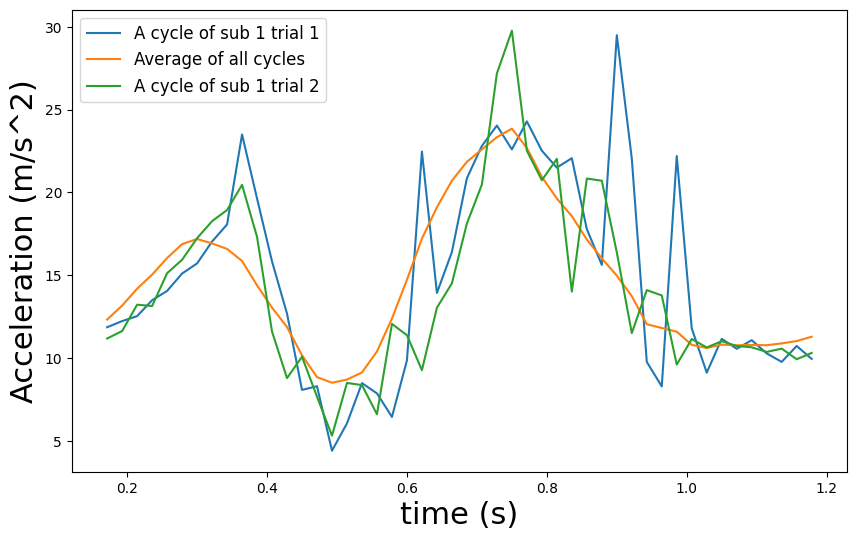

In [ ]:
cycle = pd.DataFrame(cycle)
cycle = cycle.rolling(window=9).mean()

time = np.arange(0, 1.2, 0.02143)

print(len(time))

plt.figure(figsize=(10, 6))


plt.plot(time[8:], dframe_sub1_t1[108:156].y, label="A cycle of sub 1 trial 1")
plt.plot(time[8:], cycle[8:], label="Average of all cycles")
plt.plot(time[8:], dframe_sub1_t2[108:156].y, label="A cycle of sub 1 trial 2")
plt.xlabel("time (s)", fontsize=22)
plt.ylabel("Acceleration (m/s^2)", fontsize=22)

plt.legend(fontsize=12)
plt.show()

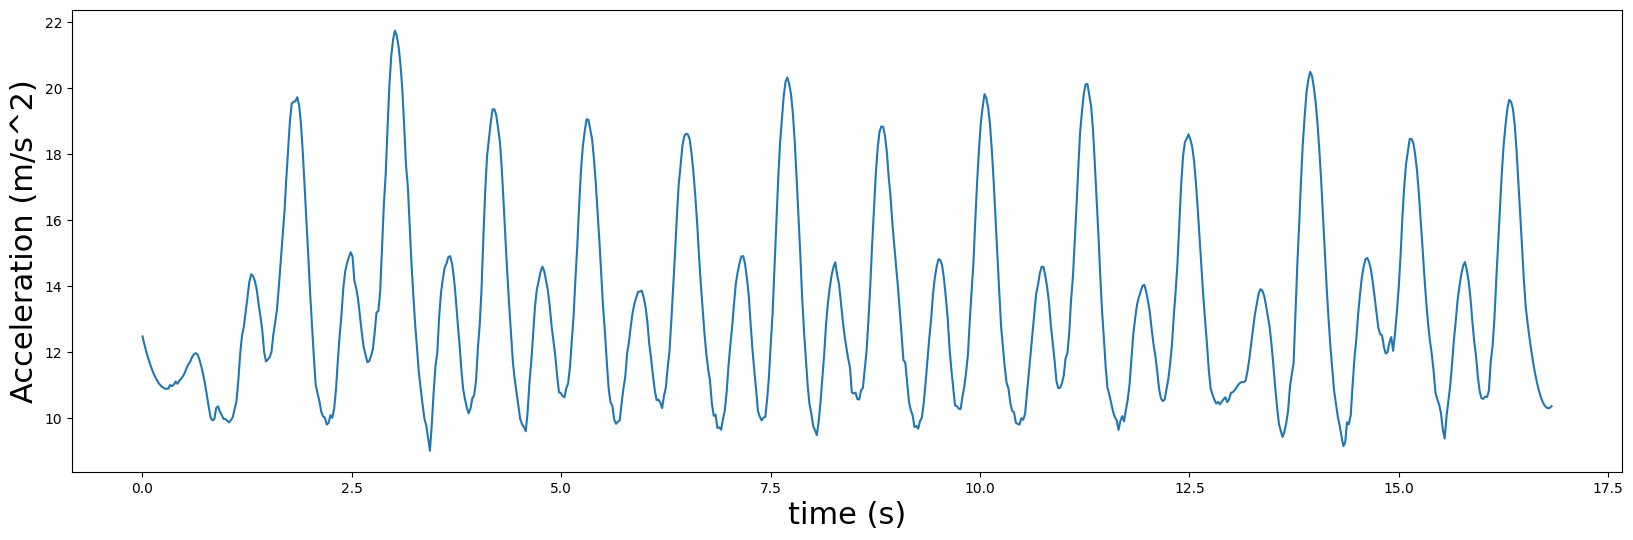

In [ ]:
import pywt
from scipy.signal import savgol_filter

plt.figure(figsize=(20, 6))

# time = []

# for i in range(len(dframe_sub1_t1.timestamps)):
#   time.append((dframe_sub1_t1.timestamps[i] - 118541)/1000)

# dframe_sub1_t1.timestamps = time

dframe_sub1_t1.y = savgol_filter(dframe_sub1_t1.y, window_length=29, polyorder=2)

plt.plot(dframe_sub1_t1.timestamps, dframe_sub1_t1.y)

plt.xlabel("time (s)", fontsize=22)
plt.ylabel("Acceleration (m/s^2)", fontsize=22)

plt.show()

In [ ]:
!python --version

Python 3.10.12


In [ ]:
import numpy as np
import pandas as pd
from scipy.signal import find_peaks

# Parameters for peak detection
min_peak_height = 13  # Adjust based on your data
min_peak_distance = 1.25  # Adjust based on your data

# Detect peaks (heel-strikes and toe-offs)
peaks, _ = find_peaks(dframe_sub1_t1['y'], height=min_peak_height, distance=min_peak_distance)

# Calculate stance and swing phases
gait_events = []
contact_time = []

for i in range(1, len(peaks), 2):
    heel_strike = peaks[i - 1]
    toe_off = peaks[i]
    gait_events.append((heel_strike, toe_off))
    contact_time.append((dframe_sub1_t1.loc[heel_strike, 'timestamps'], dframe_sub1_t1.loc[toe_off, 'timestamps']))

# Calculate swing and stance durations and step count
swing_phases = []
stance_phases = []
step_count = len(peaks)



# for i in range(1, len(peaks), 2):
#   contact_time.append((dframe_sub1_t1.loc[peaks[i - 1], 'timestamps'], dframe_sub1_t1.loc[peaks[i], 'timestamps']))

for i in range(len(gait_events)):
    stance_duration = dframe_sub1_t1.loc[gait_events[i][1], 'timestamps'] - dframe_sub1_t1.loc[gait_events[i][0], 'timestamps']
    stance_phases.append(stance_duration)
    if i != 0:
      swing_duration = dframe_sub1_t1.loc[gait_events[i][0], 'timestamps'] - dframe_sub1_t1.loc[gait_events[i-1][1], 'timestamps']
      swing_phases.append(swing_duration)

# Print extracted gait features
print("Swing Phases:")
for duration in swing_phases:
    print(f"Duration: {duration:.2f}s")

print("\nStance Phases:")
for duration in stance_phases:
    print(f"Duration: {duration:.2f}s")

print("\nStep Count:", step_count)


Swing Phases:
Duration: 0.64s
Duration: 0.66s
Duration: 0.59s
Duration: 0.66s
Duration: 0.68s
Duration: 0.57s
Duration: 0.68s
Duration: 0.68s
Duration: 0.68s
Duration: 0.86s
Duration: 0.68s
Duration: 0.64s

Stance Phases:
Duration: 0.55s
Duration: 0.53s
Duration: 0.51s
Duration: 0.53s
Duration: 0.53s
Duration: 0.53s
Duration: 0.55s
Duration: 0.55s
Duration: 0.55s
Duration: 0.53s
Duration: 0.59s
Duration: 0.53s
Duration: 0.53s

Step Count: 26


In [ ]:
print(contact_time)

[(1.298, 1.848), (2.486, 3.014), (3.674, 4.18), (4.774, 5.302), (5.962, 6.49), (7.172, 7.699), (8.271, 8.821), (9.503, 10.053), (10.735, 11.282), (11.961, 12.489), (13.347, 13.941), (14.623, 15.151), (15.789, 16.317)]


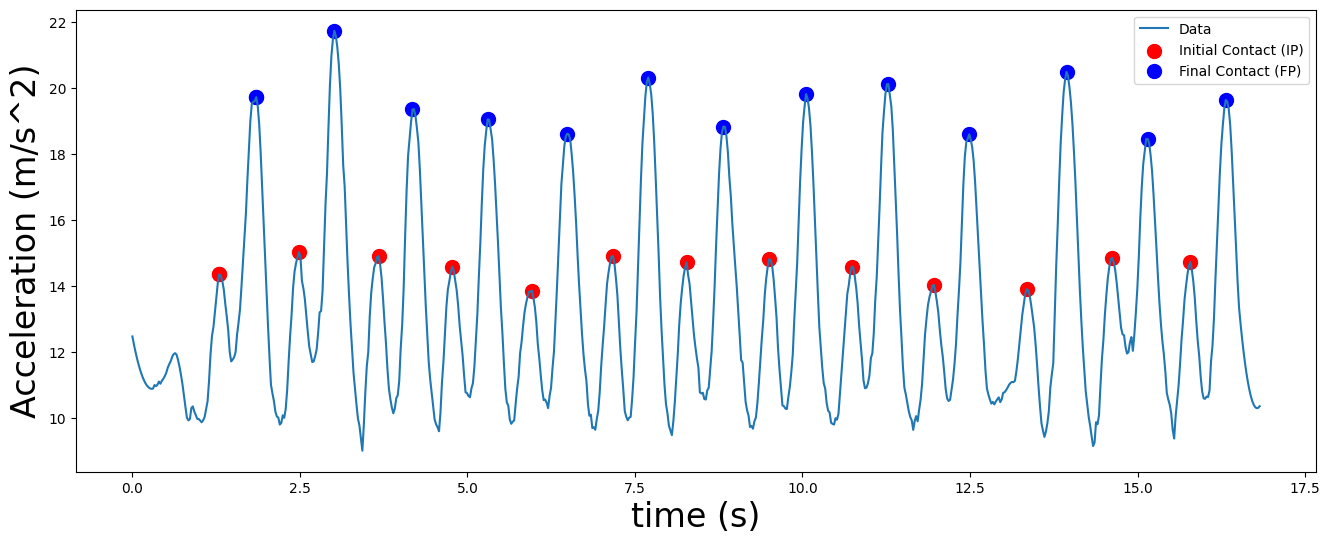

In [ ]:
plt.figure(figsize=(16, 6))
plt.plot(dframe_sub1_t1.timestamps, (dframe_sub1_t1.y), label='Data')

count = 0
for index in contact_time:
    interpolated_value_0 = np.interp(index[0], dframe_sub1_t1.timestamps, (dframe_sub1_t1.y))  # Interpolate value at float index
    interpolated_value_1 = np.interp(index[1], dframe_sub1_t1.timestamps, (dframe_sub1_t1.y))  # Interpolate value at float index

    if count == 0:
      plt.scatter(index[0], interpolated_value_0, color='red', marker='o', s=100, label='Initial Contact (IP)')
      plt.scatter(index[1], interpolated_value_1, color='blue', marker='o', s=100, label='Final Contact (FP)')
    plt.scatter(index[0], interpolated_value_0, color='red', marker='o', s=100)
    plt.scatter(index[1], interpolated_value_1, color='blue', marker='o', s=100)

    count += 1

plt.legend(fontsize=10)
plt.xlabel("time (s)", fontsize=24)
plt.ylabel("Acceleration (m/s^2)", fontsize=24)

plt.show()

In [ ]:
dframe_sub1_t2 = pd.read_csv("drive/MyDrive/project_csv_data/gait_Janvi_1_2.csv")
dframe_sub1_t2.head()

,y,timestamps
0,10.69,173736
1,10.46,173758
2,10.56,173780
3,10.89,173802
4,11.48,173824


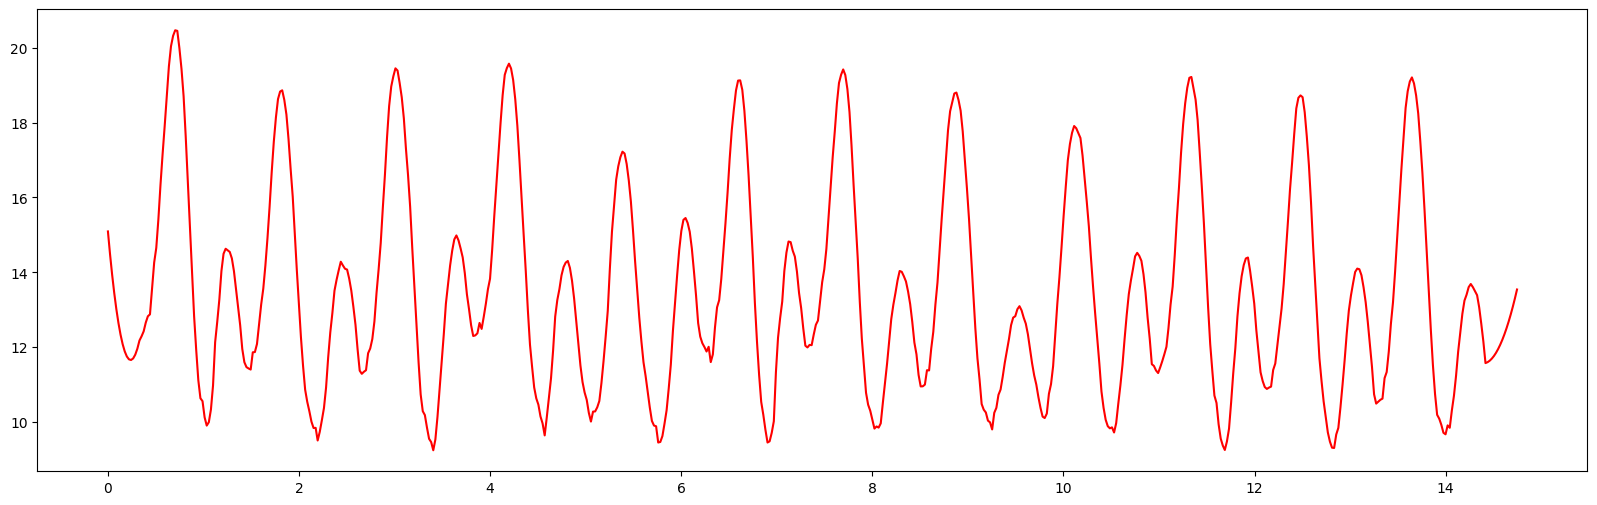

In [ ]:
import pywt
from scipy.signal import savgol_filter

plt.figure(figsize=(20, 6))

time1 = []

for i in range(len(dframe_sub1_t2.timestamps)):
  time1.append((dframe_sub1_t2.timestamps[i] - 173736)/1000)

filtered_data1 = savgol_filter(dframe_sub1_t2.y, window_length=31, polyorder=2)

plt.plot(time1, filtered_data1, 'r')
#plt.plot(time, filtered_data)
plt.show()

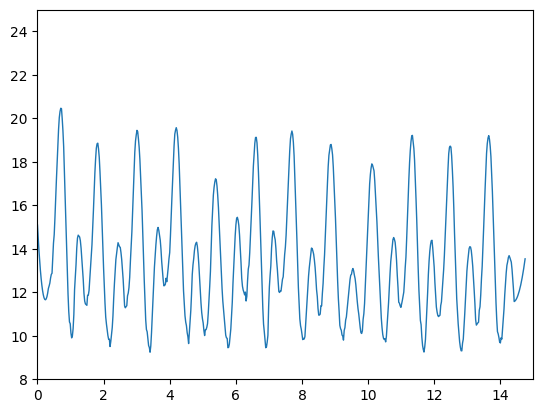

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation

# initializing a figure in
# which the graph will be plotted
fig = plt.figure()

# marking the x-axis and y-axis
axis = plt.axes(xlim =(0, 15),
				ylim =(8, 25))

# initializing a line variable
line, = axis.plot([], [], lw = 1)

# data which the line will
# contain (x, y)
def init():
	line.set_data([], [])
	return line,

def animate(i):
	x = time1

	# plots a sine graph
	y = filtered_data1
	line.set_data(x, y)

	return line,

anim = FuncAnimation(fig, animate, init_func = init,
					frames = 10, interval = 200, blit = True)


anim.save('continuousSineWave.mp4',
		writer = 'ffmpeg', fps = 2)


In [ ]:
len(filtered_data1)

672

In [ ]:
cycle = []

for i in range(56):
  sum = 0;
  count = 0
  for j in range(i, len(dframe_sub1_t2.y), 56):
    sum += dframe_sub1_t2.y[i]
    count += 1
  cycle.append(sum/count)

print(cycle)

[10.69, 10.460000000000003, 10.56, 10.89, 11.480000000000002, 11.83, 14.039999999999994, 14.509999999999998, 16.539999999999996, 18.270000000000003, 19.639999999999997, 18.19, 19.88, 19.069999999999997, 14.599999999999996, 11.64, 11.53, 10.0, 5.0600000000000005, 7.5, 7.620000000000001, 4.61, 7.200000000000002, 11.53, 13.370000000000003, 15.379999999999997, 21.389999999999997, 22.949999999999992, 28.550000000000008, 30.0, 21.610000000000003, 21.610000000000003, 21.789999999999996, 20.13, 21.979999999999993, 26.050000000000008, 12.47, 12.819999999999995, 18.28, 12.019999999999998, 8.950000000000001, 11.510000000000003, 10.769999999999998, 10.83, 10.819999999999999, 10.409999999999998, 10.840000000000002, 11.11, 10.33, 10.789999999999997, 11.11, 11.0, 10.659999999999998, 11.81, 11.680000000000001, 13.19]


56


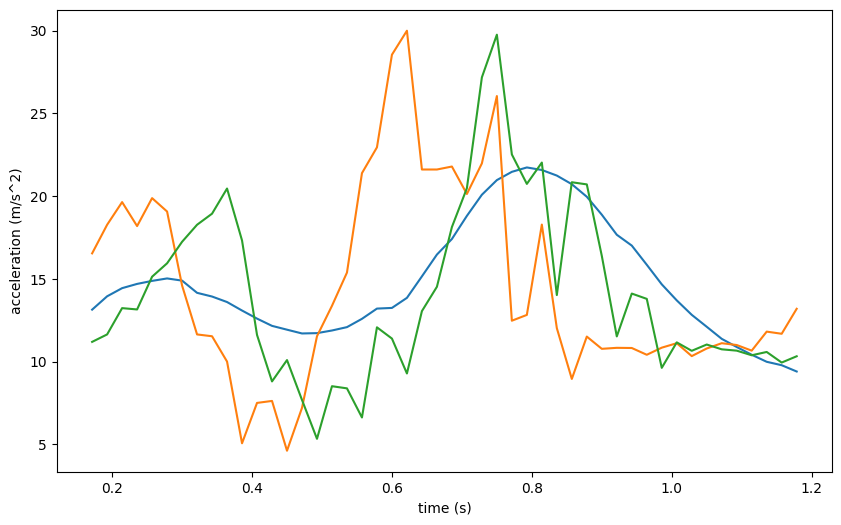

In [ ]:
#cycle = pd.DataFrame(cycle)
#cycle = cycle.rolling(window=9).mean()

time = np.arange(0, 1.2, 0.02143)

print(len(time))

plt.figure(figsize=(10, 6))


plt.plot(time[8:], dframe_sub1_t1[108:156].y)
plt.plot(time[8:], cycle[8:])
plt.plot(time[8:], dframe_sub1_t2[108:156].y)
plt.xlabel("time (s)")
plt.ylabel("acceleration (m/s^2)")
plt.show()

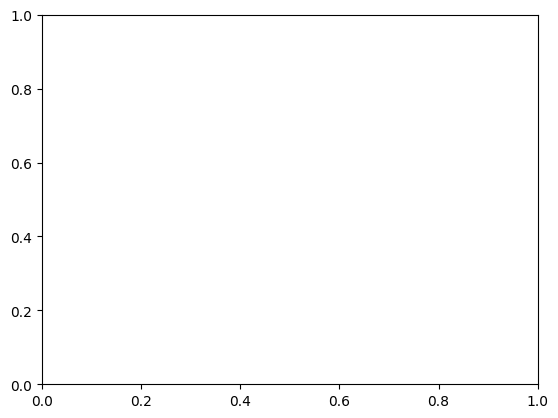

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation

fig,ax = plt.subplots()

def animate(i):
  x = time
  y = cycle

  ax.clear()
  ax.plot(x, y)
  ax.set_xlim([0,1.2])
  ax.set_ylim([8,25])


#anim = FuncAnimation(fig, animate, frmaes=M, interval = 10, blit = True)
anim = FuncAnimation(fig, animate, frames = 200, interval = 20, repeat=False)

#anim.save('Euler_Continuos_Product.gif', writer = 'imagemagick', fps = 10)
plt.show()


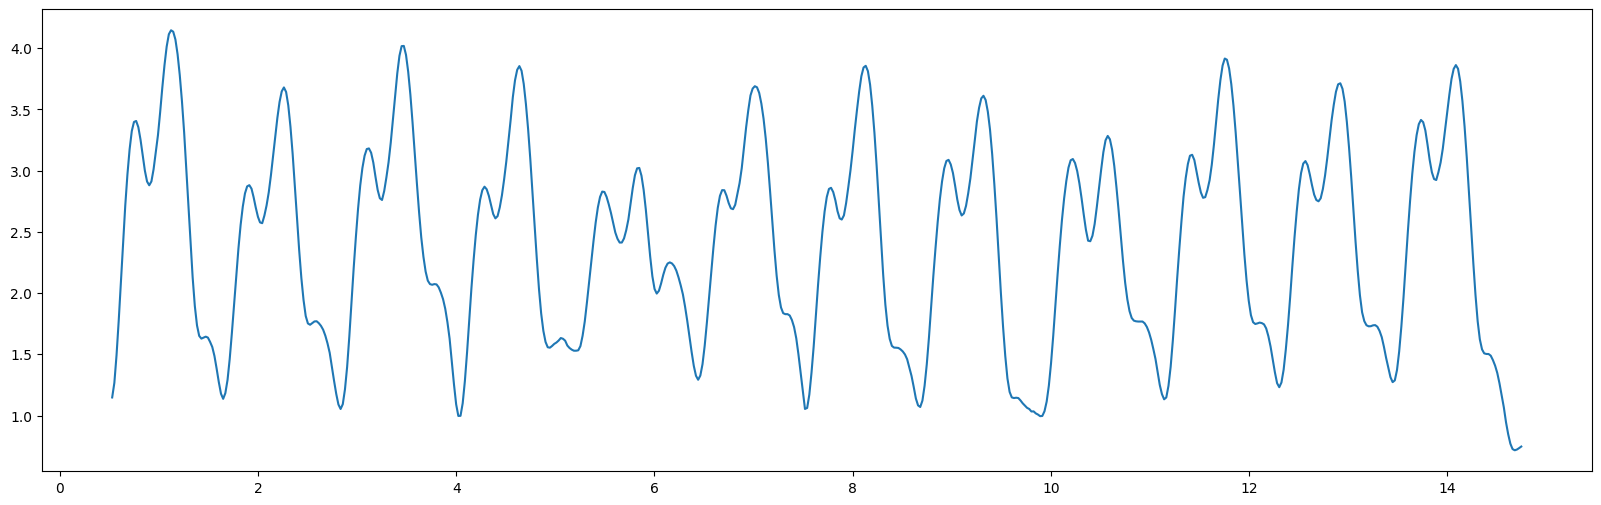

In [ ]:
filtered_data1 = pd.DataFrame(filtered_data1)
moving_std_s1_t2 = filtered_data1.rolling(window=25).std()

plt.figure(figsize=(20, 6))

plt.plot(time1, moving_std_s1_t2)
plt.show()

In [ ]:
dframe_sub2_t2 = pd.read_csv("drive/MyDrive/project_csv_data/gait_Aksh_1_2.csv")
dframe_sub2_t2.head()

,y,timestamps
0,18.32,288164
1,21.68,288186
2,11.99,288208
3,12.55,288230
4,10.89,288252


In [ ]:
dframe_sub1_t2

,y,timestamps
0,10.69,173736
1,10.46,173758
2,10.56,173780
3,10.89,173802
4,11.48,173824
...,...,...
667,8.66,188395
668,12.37,188417
669,15.31,188439
670,18.00,188461


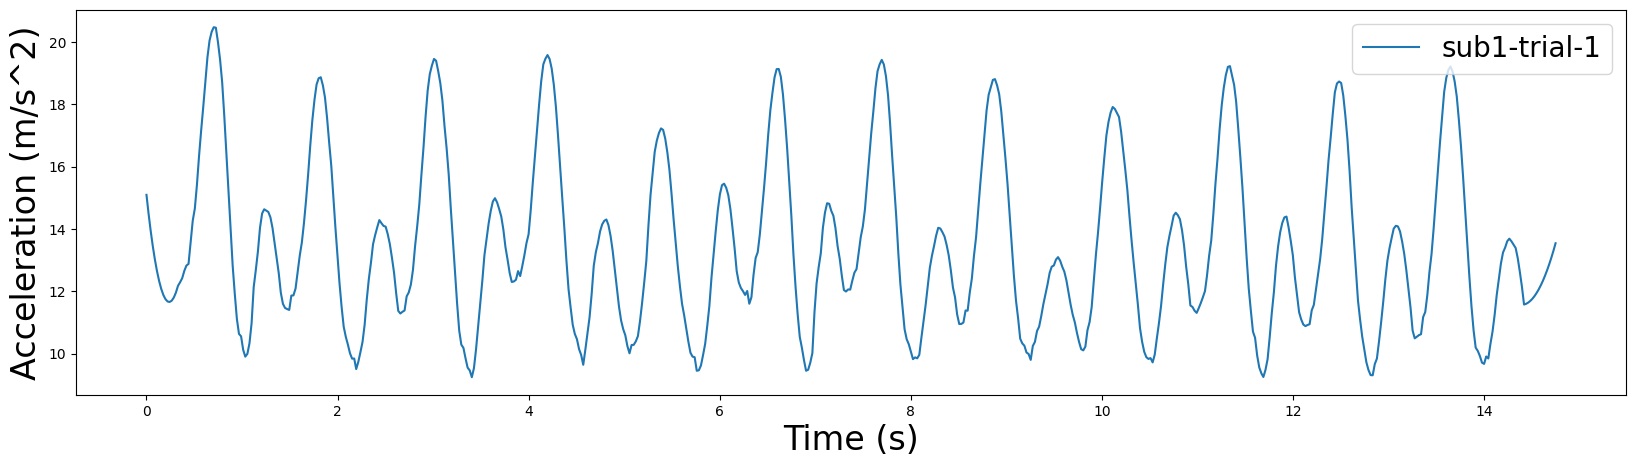

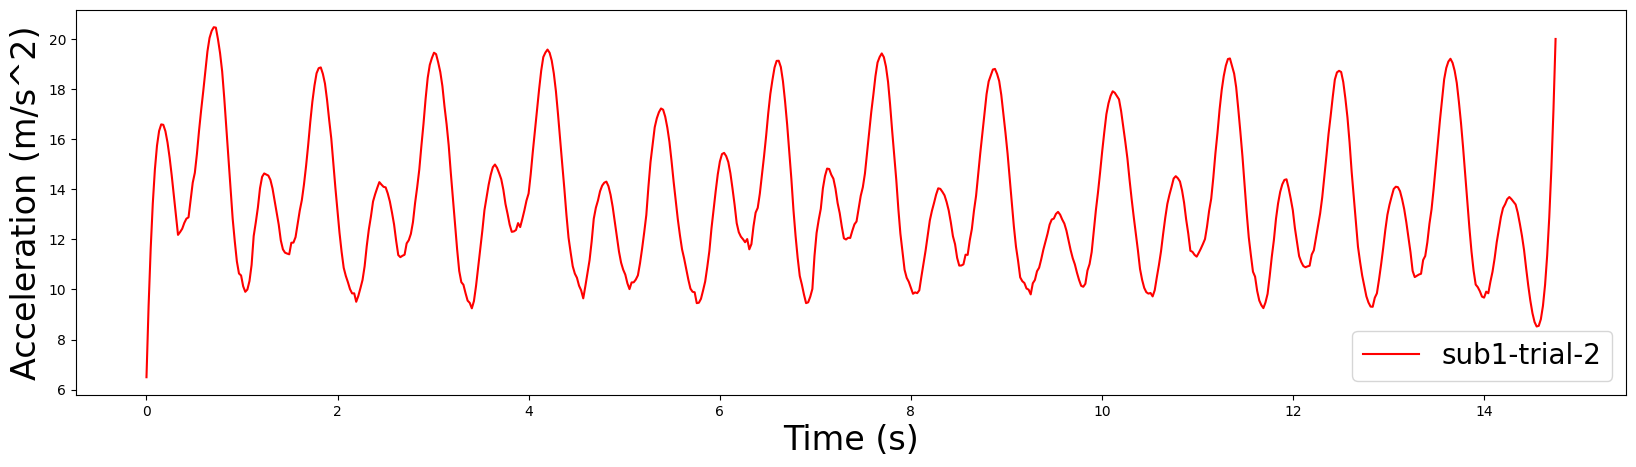

In [ ]:
import matplotlib.pyplot as plt2

plt.figure(figsize=(20, 5))

time3 = []

for i in range(len(dframe_sub1_t2.timestamps)):
  time3.append((dframe_sub1_t2.timestamps[i] - 173736)/1000)

filtered_data3 = savgol_filter(dframe_sub1_t2.y, window_length=31, polyorder=3)


plt.plot(time1, filtered_data1, label="sub1-trial-1")
plt.xlabel("Time (s)", fontsize=24)
plt.ylabel("Acceleration (m/s^2)", fontsize=24)
plt.legend(fontsize = 20)
plt.show()

plt2.figure(figsize=(20, 5))
plt2.plot(time3, filtered_data3, 'r', label="sub1-trial-2")
plt2.xlabel("Time (s)", fontsize=24)
plt2.ylabel("Acceleration (m/s^2)", fontsize=24)
plt2.legend(fontsize = 20)
plt2.show()

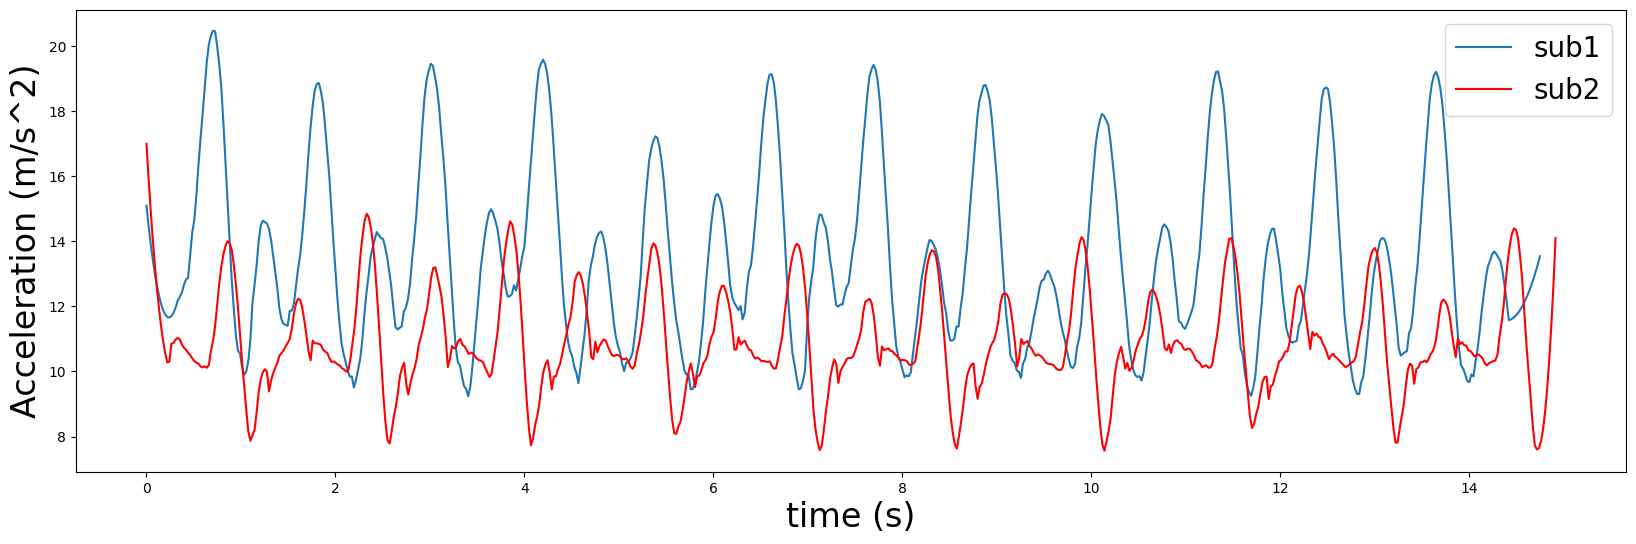

In [ ]:
plt.figure(figsize=(20, 6))

time2 = []

for i in range(len(dframe_sub2_t2.timestamps)):
  time2.append((dframe_sub2_t2.timestamps[i] - 288164)/1000)

filtered_data2 = savgol_filter(dframe_sub2_t2.y, window_length=21, polyorder=2)


plt.plot(time1, filtered_data1, label="sub1")
plt.plot(time2, filtered_data2, 'r', label="sub2")
plt.xlabel("time (s)", fontsize=24)
plt.ylabel("Acceleration (m/s^2)", fontsize=24)

plt.legend(fontsize = 20)

plt.show()

In [ ]:
dframe_sub3_t2 = pd.read_csv("drive/MyDrive/project_csv_data/gait_Hetvi_1_2.csv")
dframe_sub3_t2.head()

,y,timestamps
0,11.65,272479
1,11.16,272501
2,11.19,272523
3,11.41,272545
4,11.63,272567


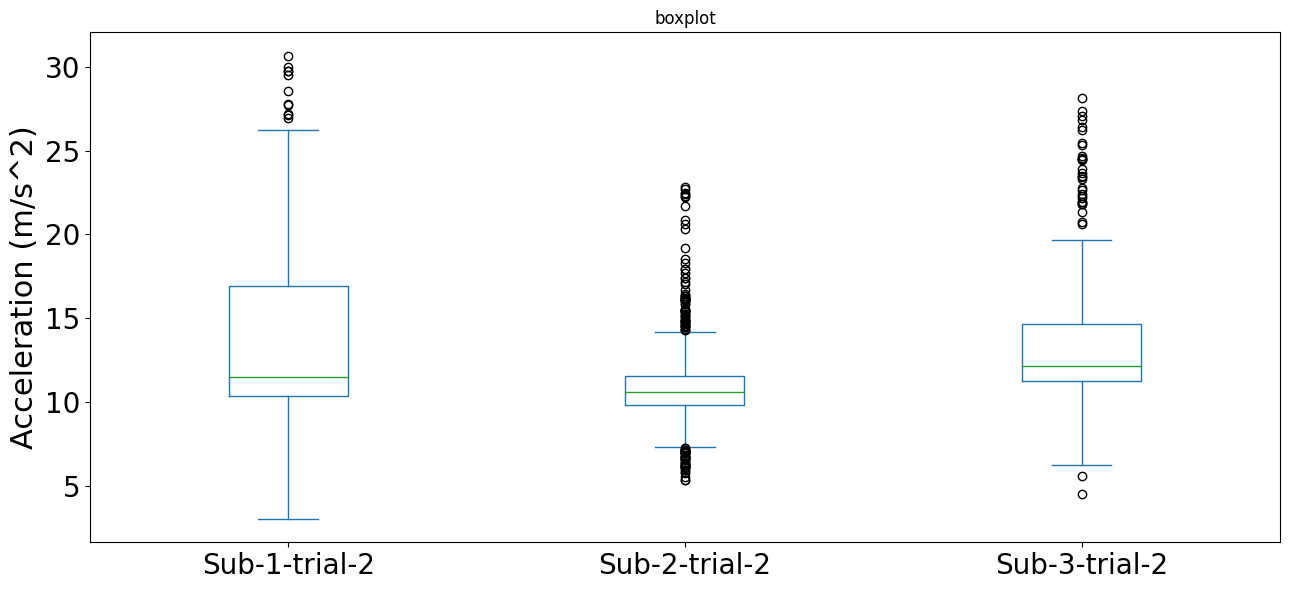

In [ ]:
plt.rcParams["figure.figsize"] = [13, 6]
plt.rcParams["figure.autolayout"] = True

# Pandas dataframe
data = pd.DataFrame({"Sub-1-trial-2": dframe_sub1_t2.y, "Sub-2-trial-2": dframe_sub2_t2.y, "Sub-3-trial-2": dframe_sub3_t2.y})

# Plot the dataframe
ax = data[['Sub-1-trial-2', 'Sub-2-trial-2', 'Sub-3-trial-2']].plot(kind='box', title='boxplot', fontsize = 20)

plt.ylabel("Acceleration (m/s^2)", fontsize = 22)
# Display the plot
plt.show()

Text(0, 0.5, 'Acceleration (m/s^2)')

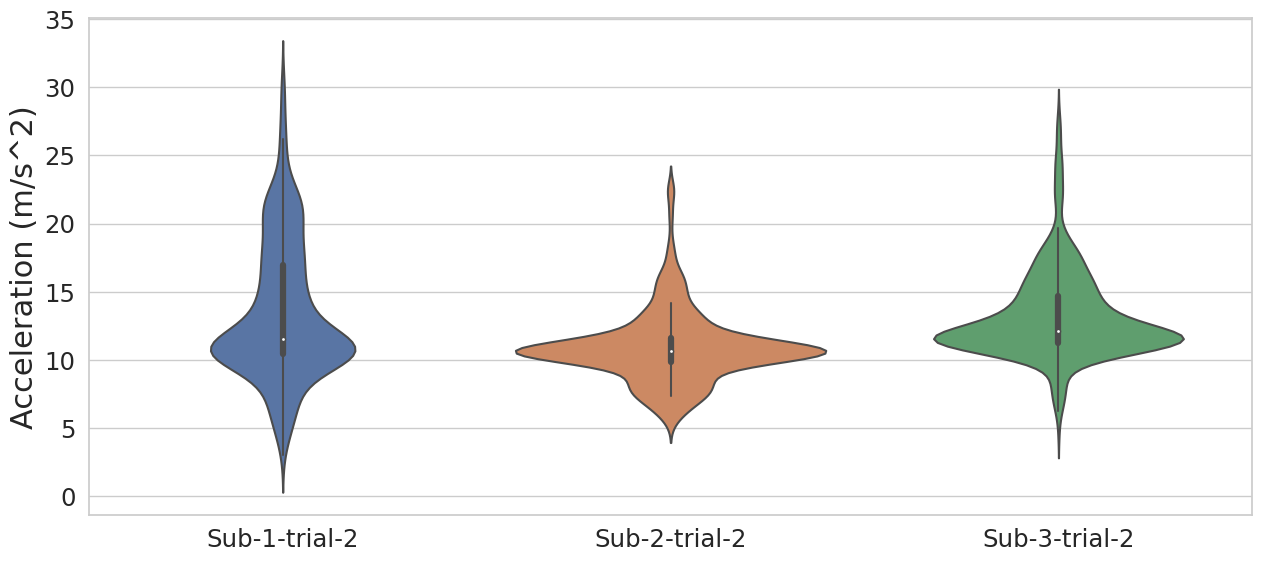

In [ ]:

import seaborn

seaborn.set(font_scale = 1.6, style = 'whitegrid')

tip = seaborn.load_dataset('tips')

# plt.rcParams["figure.figsize"] = [13, 6]
# plt.rcParams["figure.autolayout"] = True

# Pandas dataframe
data = pd.DataFrame({"Sub-1-trial-2": dframe_sub1_t2.y, "Sub-2-trial-2": dframe_sub2_t2.y, "Sub-3-trial-2": dframe_sub3_t2.y})

# # Plot the dataframe
# ax = data[['Sub-1-trial-2', 'Sub-2-trial-2', 'Sub-3-trial-2']].plot(kind='box', title='boxplot', fontsize = 20)



plots = seaborn.violinplot(data = data)

plots.set_ylabel("Acceleration (m/s^2)", fontsize = 22)

<Axes: >

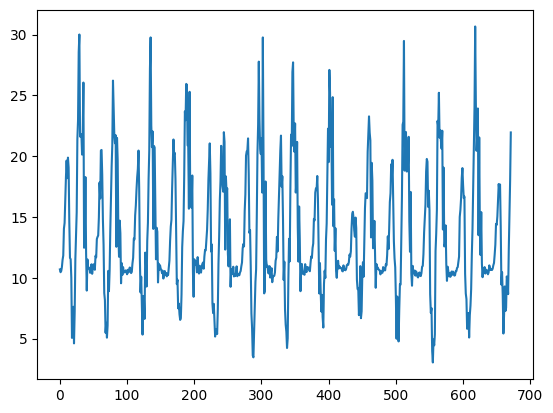

In [ ]:
dframe_sub1_t2.y.plot()

<Axes: >

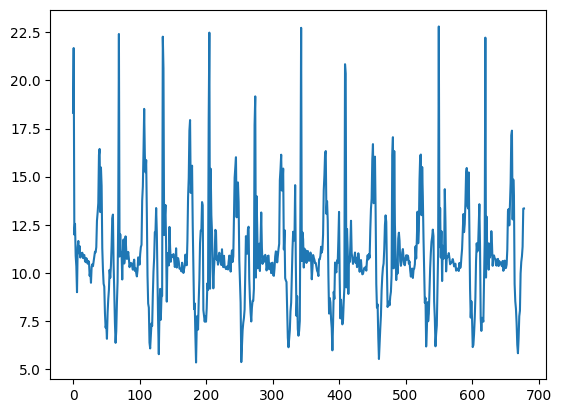

In [ ]:
dframe_sub2_t2.y.plot()

<Axes: >

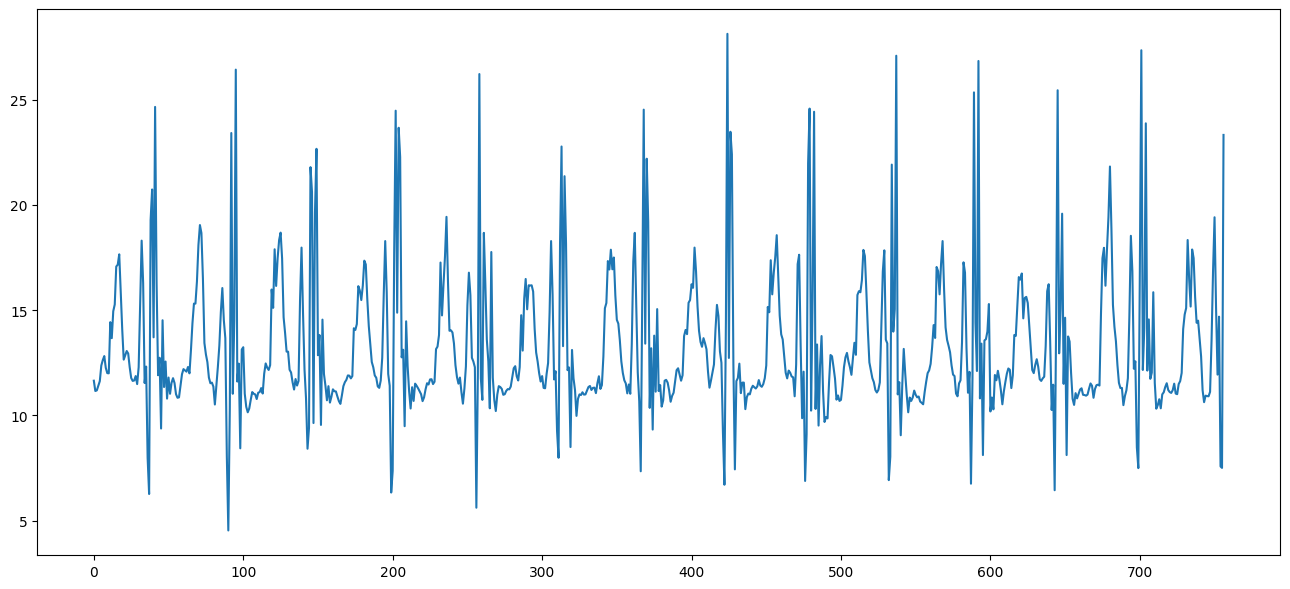

In [ ]:
dframe_sub3_t2.y.plot()

In [ ]:
dframe_sub1_t3 = pd.read_csv("drive/MyDrive/project_csv_data/gait_Janvi_1_3.csv")
dframe_sub1_t3.head()

,y,timestamps
0,10.26,208331
1,10.54,208353
2,10.43,208375
3,10.37,208397
4,10.64,208419


In [ ]:
dframe_sub2_t1 = pd.read_csv("drive/MyDrive/project_csv_data/gait_Aksh_1_1.csv")
dframe_sub2_t1.head()

,y,timestamps
0,8.60,219486
1,9.40,219508
2,9.95,219530
3,10.18,219552
4,10.32,219574


In [ ]:
dframe_sub2_t3 = pd.read_csv("drive/MyDrive/project_csv_data/gait_Aksh_1_3.csv")
dframe_sub2_t3.head()

,y,timestamps
0,10.03,326389
1,10.98,326411
2,11.69,326433
3,11.88,326455
4,11.42,326477


##SSA Analysis

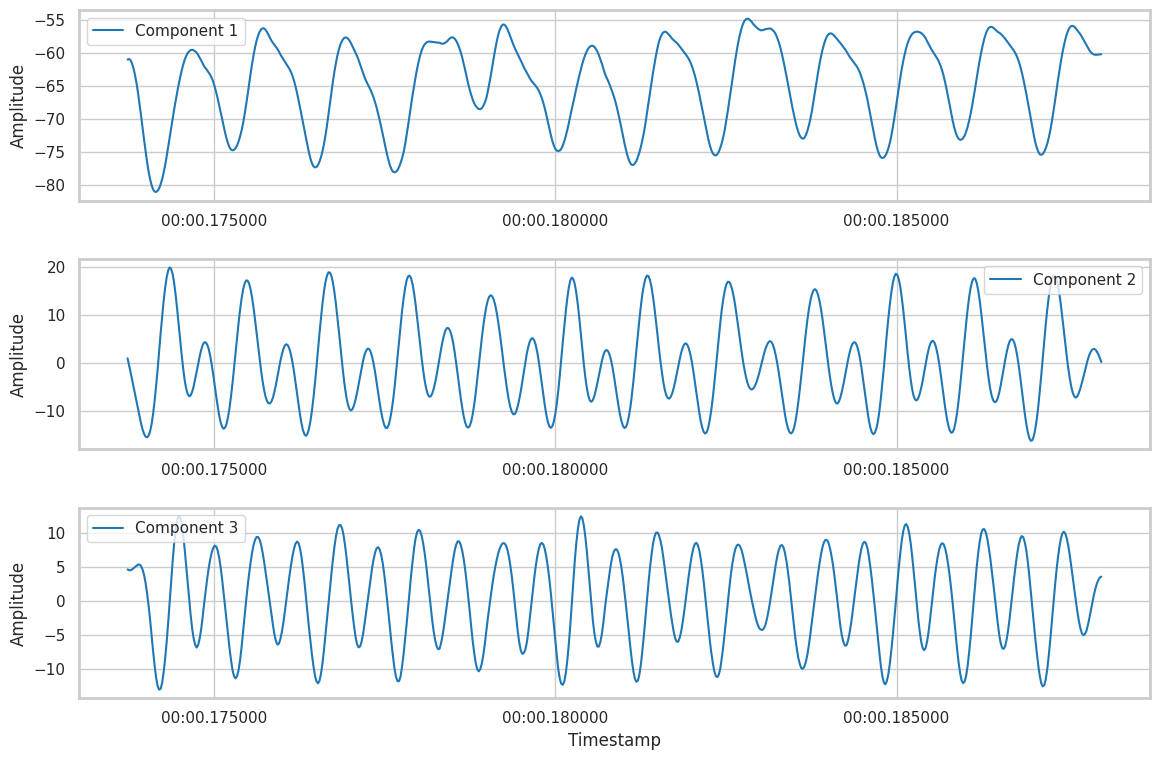

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
from matplotlib import pyplot as plt
from sklearn.decomposition import TruncatedSVD

import pywt
from scipy.signal import savgol_filter

# Step 1: Load the CSV file into a Pandas DataFrame
data = pd.read_csv("drive/MyDrive/project_csv_data/gait_Janvi_1_2.csv")

data.y = savgol_filter(data.y, window_length=31, polyorder=2)

# Convert the timestamps to datetime format
data['timestamps'] = data['timestamps'].apply(lambda x: datetime.strptime(str(x), '%f'))

# Set timestamps as the index to create a time series
data.set_index('timestamps', inplace=True)

# Step 2: Apply Singular Spectrum Analysis (SSA)
def ssa(series, window_size, n_components):
    embedding_matrix = np.array([series[i:i+window_size] for i in range(len(series) - window_size + 1)])
    u, s, v = np.linalg.svd(embedding_matrix, full_matrices=False)
    components = np.dot(u[:, :n_components], np.diag(s[:n_components])).T
    return components

window_size = 23  # You can adjust this window size
n_components = 3  # Number of components to extract

components = ssa(data['y'], window_size, n_components)

# Step 3: Visualize the individual component signals
plt.figure(figsize=(12, 8))

for i in range(n_components):
    plt.subplot(n_components, 1, i+1)
    plt.plot(data.index[:-(len(data.index) - len(components[i]))], components[i], label=f'Component {i+1}')
    plt.ylabel('Amplitude')
    plt.legend()
plt.xlabel('Timestamp')
plt.tight_layout()
plt.show()


In [ ]:
# import pyActigraphy

# from pyActigraphy.analysis import SSA

# import plotly.graph_objs as go

In [ ]:
accel_1 = dframe_sub1_t2.y
accel_1.index /= 100
accel_1

0.00    10.69
0.01    10.46
0.02    10.56
0.03    10.89
0.04    11.48
        ...  
6.67     8.66
6.68    12.37
6.69    15.31
6.70    18.00
6.71    21.95
Name: y, Length: 672, dtype: float64

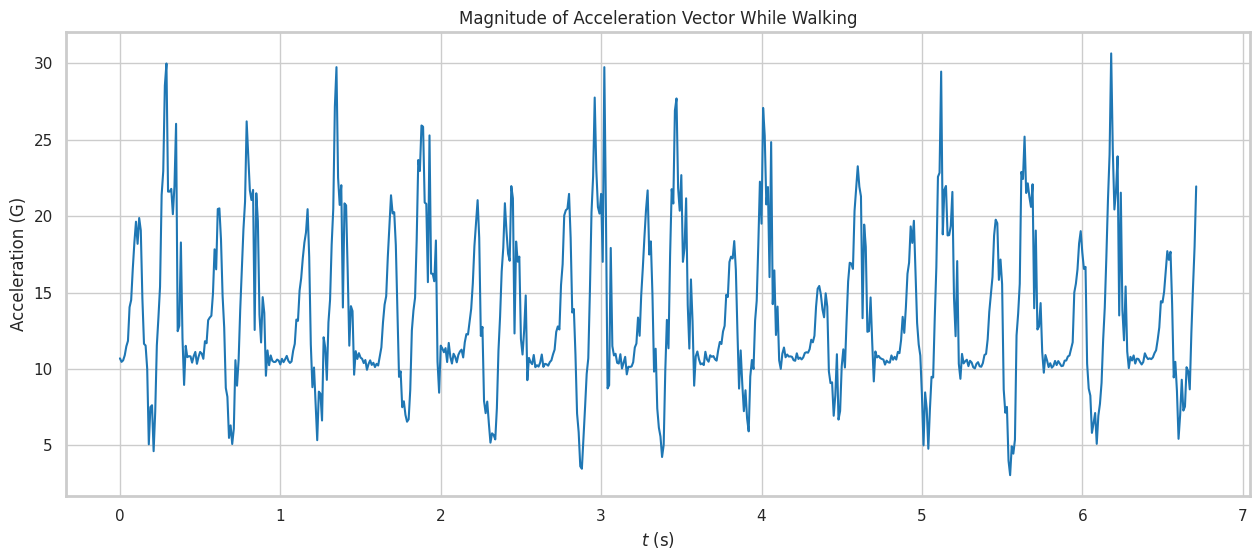

In [ ]:
accel_1.plot()
plt.xlabel(r"$t$ (s)")
plt.ylabel("Acceleration (G)")
plt.title("Magnitude of Acceleration Vector While Walking");

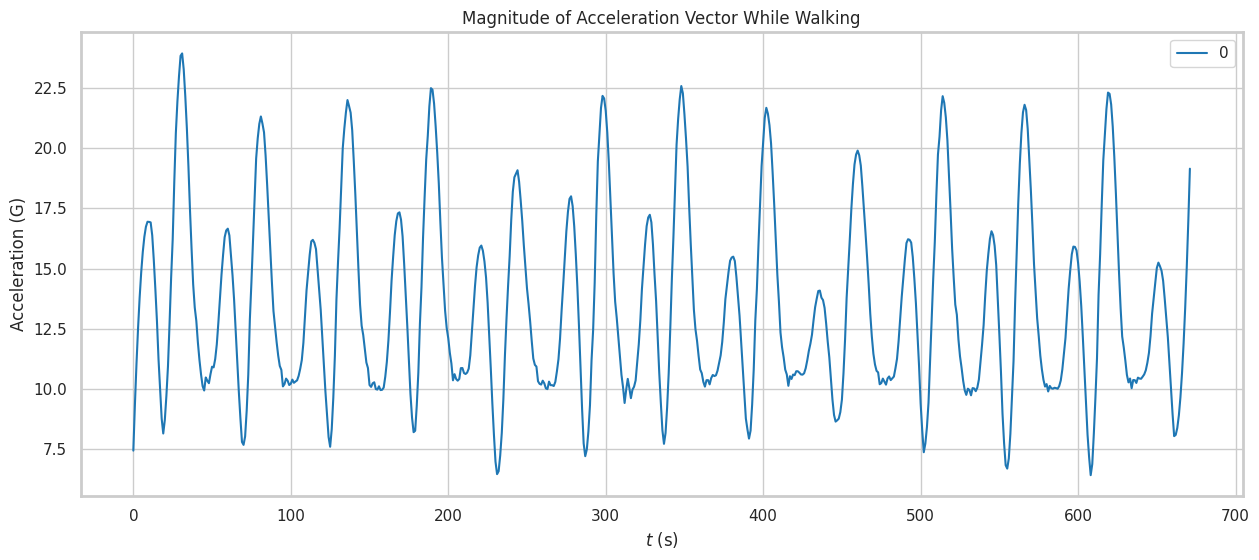

In [ ]:
filtered_data3 = savgol_filter(dframe_sub1_t2.y, window_length=21, polyorder=2)
filtered_data3 = pd.DataFrame(filtered_data3)
filtered_data3.plot()
plt.xlabel(r"$t$ (s)")
plt.ylabel("Acceleration (G)")
plt.title("Magnitude of Acceleration Vector While Walking");

In [ ]:
import numpy as np
from numpy import pi
import matplotlib.pyplot as plt
import pandas as pd

# Fiddle with figure settings here:
plt.rcParams['figure.figsize'] = (20,6)
plt.rcParams['font.size'] = 24
plt.rcParams['image.cmap'] = 'plasma'
plt.rcParams['axes.linewidth'] = 2
# Set the default colour cycle (in case someone changes it...)
from cycler import cycler
cols = plt.get_cmap('tab10').colors
plt.rcParams['axes.prop_cycle'] = cycler(color=cols)

# A simple little 2D matrix plotter, excluding x and y labels.
def plot_2d(m, title=""):
    plt.imshow(m)
    plt.xticks([])
    plt.yticks([])
    plt.title(title)

In [ ]:
class SSA(object):

    __supported_types = (pd.Series, np.ndarray, list)

    def __init__(self, tseries, L, save_mem=True):
        """
        Decomposes the given time series with a singular-spectrum analysis. Assumes the values of the time series are
        recorded at equal intervals.

        Parameters
        ----------
        tseries : The original time series, in the form of a Pandas Series, NumPy array or list.
        L : The window length. Must be an integer 2 <= L <= N/2, where N is the length of the time series.
        save_mem : Conserve memory by not retaining the elementary matrices. Recommended for long time series with
            thousands of values. Defaults to True.

        Note: Even if an NumPy array or list is used for the initial time series, all time series returned will be
        in the form of a Pandas Series or DataFrame object.
        """

        # Tedious type-checking for the initial time series
        if not isinstance(tseries, self.__supported_types):
            raise TypeError("Unsupported time series object. Try Pandas Series, NumPy array or list.")

        # Checks to save us from ourselves
        self.N = len(tseries)
        if not 2 <= L <= self.N/2:
            raise ValueError("The window length must be in the interval [2, N/2].")

        self.L = L
        self.orig_TS = pd.Series(tseries)
        self.K = self.N - self.L + 1

        # Embed the time series in a trajectory matrix
        self.X = np.array([self.orig_TS.values[i:L+i] for i in range(0, self.K)]).T

        # Decompose the trajectory matrix
        self.U, self.Sigma, VT = np.linalg.svd(self.X)
        self.d = np.linalg.matrix_rank(self.X)

        self.TS_comps = np.zeros((self.N, self.d))

        if not save_mem:
            # Construct and save all the elementary matrices
            self.X_elem = np.array([ self.Sigma[i]*np.outer(self.U[:,i], VT[i,:]) for i in range(self.d) ])

            # Diagonally average the elementary matrices, store them as columns in array.
            for i in range(self.d):
                X_rev = self.X_elem[i, ::-1]
                self.TS_comps[:,i] = [X_rev.diagonal(j).mean() for j in range(-X_rev.shape[0]+1, X_rev.shape[1])]

            self.V = VT.T
        else:
            # Reconstruct the elementary matrices without storing them
            for i in range(self.d):
                X_elem = self.Sigma[i]*np.outer(self.U[:,i], VT[i,:])
                X_rev = X_elem[::-1]
                self.TS_comps[:,i] = [X_rev.diagonal(j).mean() for j in range(-X_rev.shape[0]+1, X_rev.shape[1])]

            self.X_elem = "Re-run with save_mem=False to retain the elementary matrices."

            # The V array may also be very large under these circumstances, so we won't keep it.
            self.V = "Re-run with save_mem=False to retain the V matrix."

        # Calculate the w-correlation matrix.
        self.calc_wcorr()

    def components_to_df(self, n=0):
        """
        Returns all the time series components in a single Pandas DataFrame object.
        """
        if n > 0:
            n = min(n, self.d)
        else:
            n = self.d

        # Create list of columns - call them F0, F1, F2, ...
        cols = ["F{}".format(i) for i in range(n)]
        return pd.DataFrame(self.TS_comps[:, :n], columns=cols, index=self.orig_TS.index)


    def reconstruct(self, indices):
        """
        Reconstructs the time series from its elementary components, using the given indices. Returns a Pandas Series
        object with the reconstructed time series.

        Parameters
        ----------
        indices: An integer, list of integers or slice(n,m) object, representing the elementary components to sum.
        """
        if isinstance(indices, int): indices = [indices]

        ts_vals = self.TS_comps[:,indices].sum(axis=1)
        return pd.Series(ts_vals, index=self.orig_TS.index)

    def calc_wcorr(self):
        """
        Calculates the w-correlation matrix for the time series.
        """

        # Calculate the weights
        w = np.array(list(np.arange(self.L)+1) + [self.L]*(self.K-self.L-1) + list(np.arange(self.L)+1)[::-1])

        def w_inner(F_i, F_j):
            return w.dot(F_i*F_j)

        # Calculated weighted norms, ||F_i||_w, then invert.
        F_wnorms = np.array([w_inner(self.TS_comps[:,i], self.TS_comps[:,i]) for i in range(self.d)])
        F_wnorms = F_wnorms**-0.5

        # Calculate Wcorr.
        self.Wcorr = np.identity(self.d)
        for i in range(self.d):
            for j in range(i+1,self.d):
                self.Wcorr[i,j] = abs(w_inner(self.TS_comps[:,i], self.TS_comps[:,j]) * F_wnorms[i] * F_wnorms[j])
                self.Wcorr[j,i] = self.Wcorr[i,j]

    def plot_wcorr(self, min=None, max=None):
        """
        Plots the w-correlation matrix for the decomposed time series.
        """
        if min is None:
            min = 0
        if max is None:
            max = self.d

        if self.Wcorr is None:
            self.calc_wcorr()

        ax = plt.imshow(self.Wcorr)
        plt.xlabel(r"$\tilde{F}_i$")
        plt.ylabel(r"$\tilde{F}_j$")
        plt.colorbar(ax.colorbar, fraction=0.045)
        ax.colorbar.set_label("$W_{i,j}$")
        plt.clim(0,1)

        # For plotting purposes:
        if max == self.d:
            max_rnge = self.d-1
        else:
            max_rnge = max

        plt.xlim(min-0.5, max_rnge+0.5)
        plt.ylim(max_rnge+0.5, min-0.5)


In [ ]:

window = 336 # samples
accel_ssa = SSA(accel_1, window)

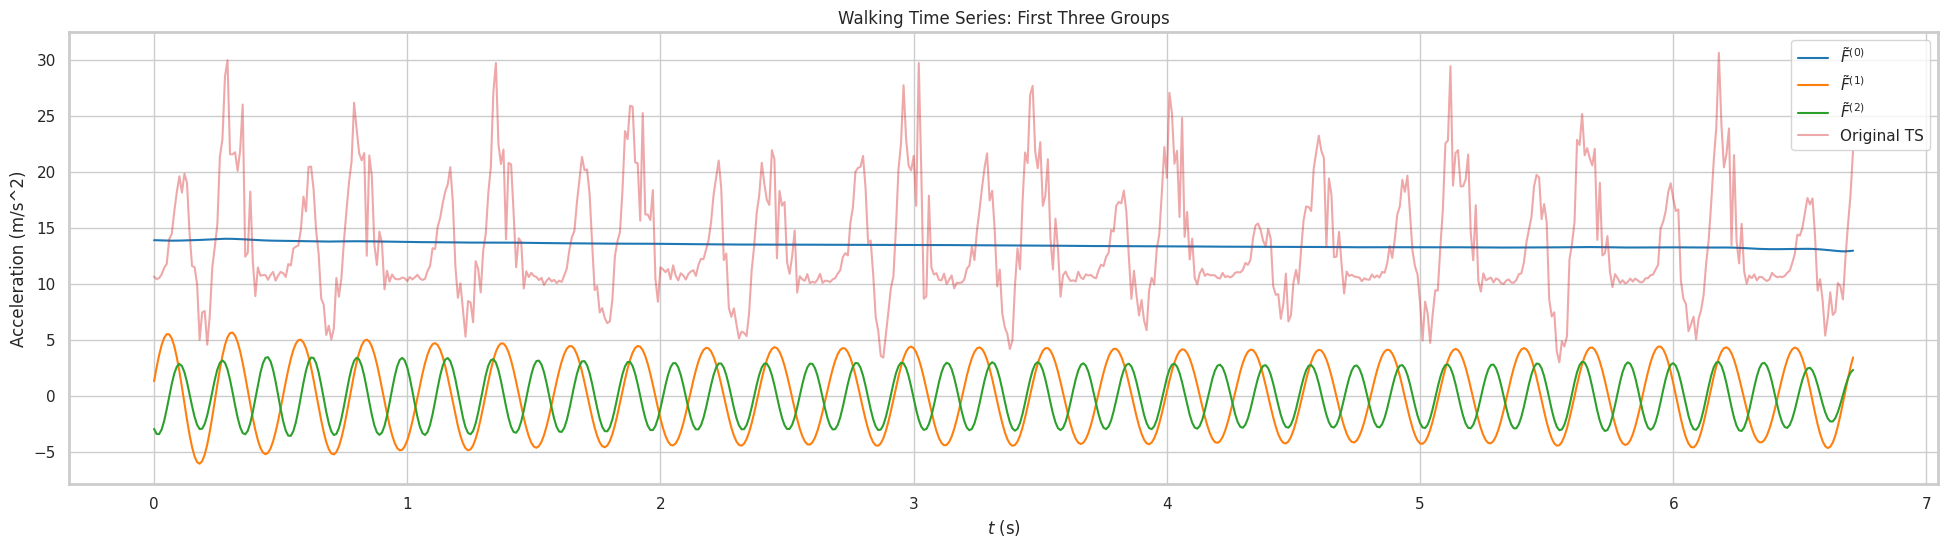

In [ ]:
accel_ssa.reconstruct(0).plot()
accel_ssa.reconstruct([1,2]).plot()
accel_ssa.reconstruct([3,4]).plot()
accel_ssa.orig_TS.plot(alpha=0.4)
plt.title("Walking Time Series: First Three Groups")
plt.xlabel(r"$t$ (s)")
plt.ylabel("Acceleration (m/s^2)")
legend = [r"$\tilde{{F}}^{{({0})}}$".format(i) for i in range(3)] + ["Original TS"]
plt.legend(legend);

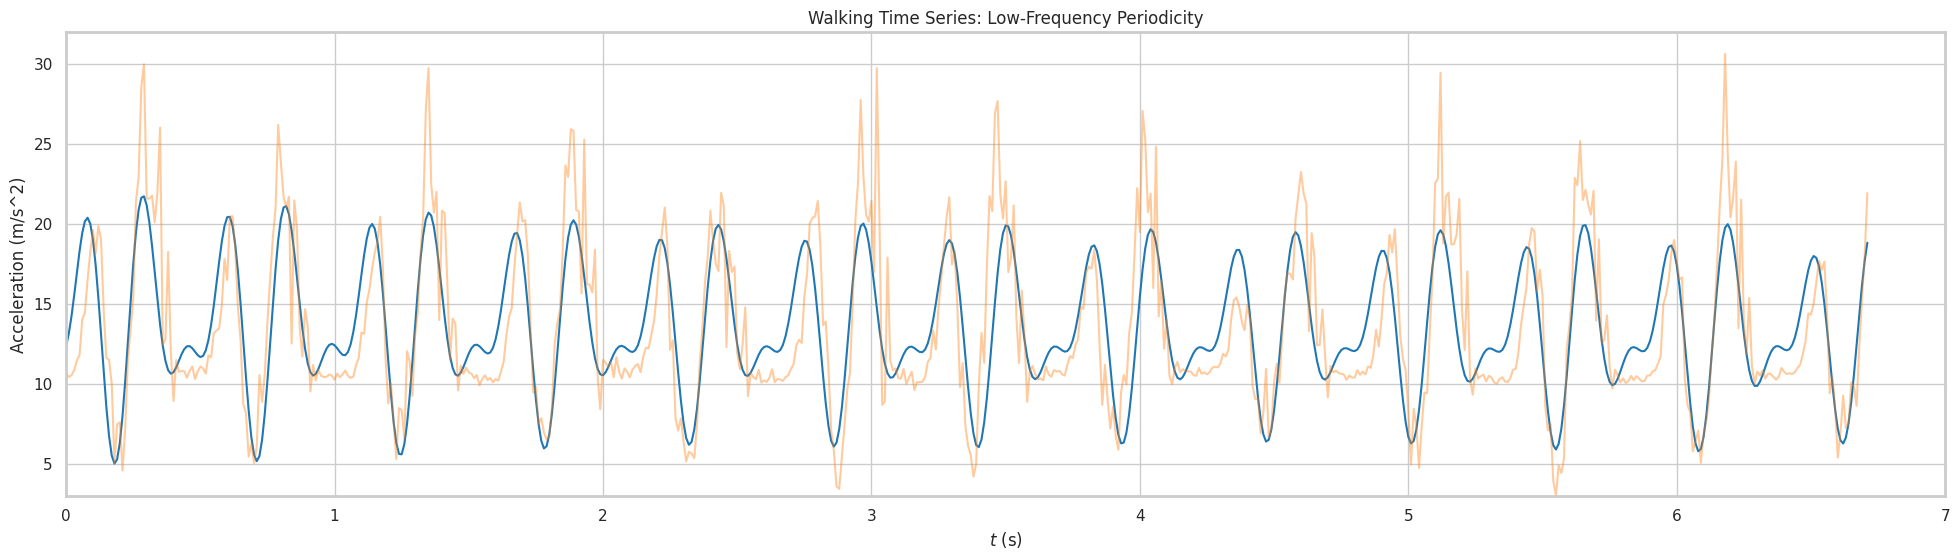

In [ ]:
accel_ssa.reconstruct(slice(0,5)).plot()
accel_ssa.orig_TS.plot(alpha=0.4)
plt.title("Walking Time Series: Low-Frequency Periodicity")
plt.xlabel(r"$t$ (s)")
plt.ylabel("Acceleration (m/s^2)")
plt.xlim(0,7)
plt.ylim(3, 32);

In [ ]:
def extract_series(subject, walk):
    walk_dict = { 1 : "t", 2 : "wlk_15"}
    file_path = "drive/MyDrive/project_csv_data/"
    file = "gait_{}_1_{}.csv".format(subject, walk)
    file_path += file
    walk = pd.read_csv(file_path)
    # cols = ["userAcceleration.x", "userAcceleration.y", "userAcceleration.z"]
    accel = walk.y

    # Convert acceleration values to z-scores.
    accel = (accel - accel.mean())/accel.std()

    # Convert index to units of seconds
    accel.index /= 100

    # Perform the SSA
    start = 0 # seconds, not samples
    end = 5 # seconds
    window = 200 # samples
    return SSA(accel.loc[start:end], window)

In [ ]:
subjects = ['Janvi','Aksh','Hetvi']
subject_ssa = {}

# Load and process the time series for each participant, storing the SSA objects.
# This will take a minute or two.

for subject in subjects:
    print("Subject #{}".format(subject))
    subject_ssa[subject] = extract_series(subject, 1), extract_series(subject, 2)

Subject #Janvi
Subject #Aksh
Subject #Hetvi


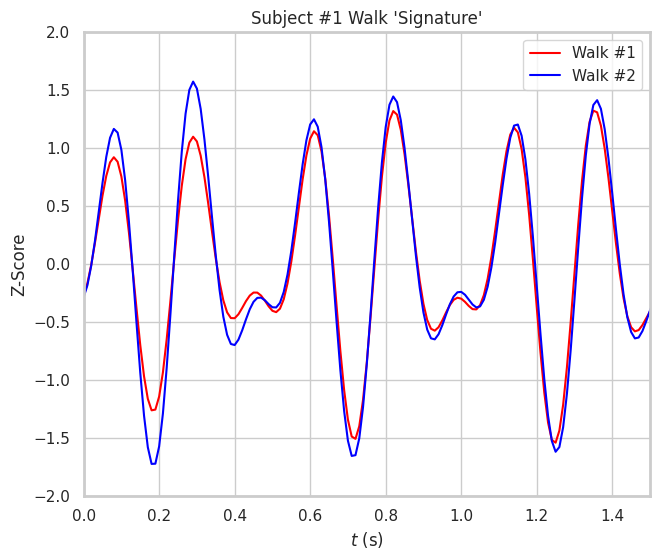

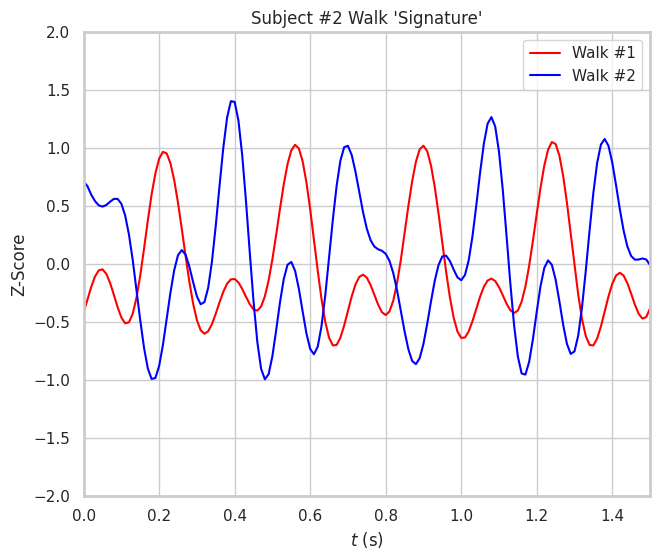

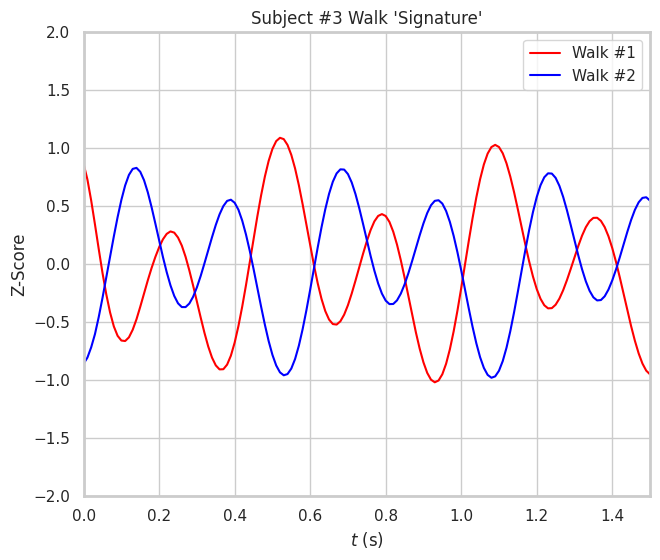

In [ ]:
genders = ["F"] + ["M"] + ["F"]
count = 1
for subject, gender in zip(subjects, genders):
    ssa_1, ssa_2 = subject_ssa[subject]
    ssa_1.reconstruct(slice(0,4)).plot(color='red', figsize=(7,6))
    ssa_2.reconstruct(slice(0,4)).plot(color='blue')
    plt.xlim(0,1.5)
    plt.ylim(-2,2)
    plt.title("Subject #{} Walk 'Signature'".format(str(count)))
    plt.legend(["Walk #1", "Walk #2"])
    plt.xlabel(r"$t$ (s)")
    plt.ylabel("Z-Score")
    plt.show()
    count += 1

In [ ]:
1. Load accelerometer data (timestamp, magnitude)
2. Define parameters: min_peak_height, min_peak_distance
3. Detect peaks: peaks = find_peaks(magnitude, height=min_peak_height, distance=min_peak_distance)

4. For i in range(1, len(peaks)):
      heel_strike, toe_off = peaks[i - 1], peaks[i]
      gait_events.append((heel_strike, toe_off))
      If i % 2 == 1:
         contact_time.append((data.loc[heel_strike, 'timestamps'], data.loc[toe_off, 'timestamps']))

5. For each heel_strike, toe_off in gait_events:
      swing_duration = timestamp[toe_off] - timestamp[heel_strike]
      stance_duration = sum(timestamp[heel_strike:toe_off].diff())
      swing_durations.append(swing_duration)
      stance_durations.append(stance_duration)

6. step_count = length(gait_events)

In [ ]:
1. Load accelerometer data (timestamp, magnitude)
2. Define parameters: min_peak_height, min_peak_distance
3. Detect peaks: peaks = find_peaks(magnitude, height=min_peak_height, distance=min_peak_distance)


4. for i in range(1, len(peaks)):
      heel_strike, toe_off = peaks[i - 1], peaks[i]
      gait_events.append((heel_strike, toe_off))
      If i % 2 == 1:
         contact_time.append((data.loc[heel_strike, 'timestamps'], data.loc[toe_off, 'timestamps']))


5. for each heel_strike, toe_off in gait_events:
      swing_duration = timestamp[toe_off] - timestamp[heel_strike]
      stance_duration = sum(timestamp[heel_strike:toe_off].diff())
      swing_durations.append(swing_duration)
      stance_durations.append(stance_duration)


6. step_count = len(gait_events)